In [16]:
import math

In [26]:
# topological sort 

# o = tanh(w1x1 + w2x2 + b)

class Value:
    def __init__(self, data, _parent=(), _op=''):
        self.data = data
        self._prev = set(_parent)
        self._op = _op
        self.label = ''

    def __repr__(self):
        return f"Value(data={self.data})"

    def __mul__(self, other):
        return Value(self.data*other.data, (self, other), '*');

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def tanh(self):
        x = self.data;
        t = (math.exp(2*x)-1)/ (math.exp(2*x)+1)
        out = Value(t, (self, ), 'tanh')
        return out 
        

w1 = Value(2); w1.label = 'w1'
x1 = Value(3); x1.label = 'x1'

w2 = Value(1.5); w2.label = 'w2'
x2 = Value(-5.0); x2.label = 'x2'

w1x1 = w1*x1; w1x1.label = 'w1x1'
w2x2 = w2*x2; w2x2.label = 'w2x2'

w1x1w2x2 = w1x1+w2x2; w1x1w2x2.label = 'w1x1w2x2'

b = Value(10.0); b.label = 'b'

n = w1x1w1x1 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
o

Value(data=0.999999917201249)

In [23]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

def draw_dot_vertically(root):
  dot = Digraph(format='svg') # by default, graphs are laid out from top to bottom 
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

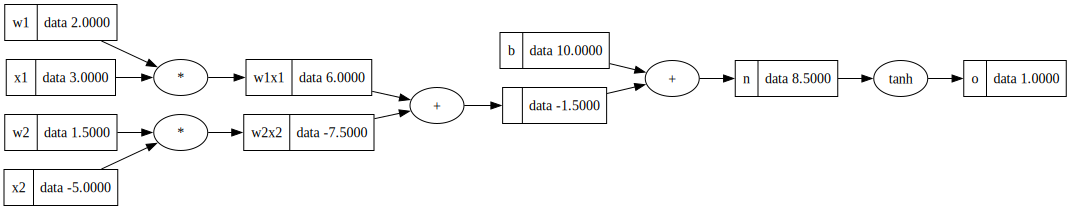

In [27]:
draw_dot(o)

In [58]:
graph1 = {
    'A': [],
}

xzzzzzzzzzzzzzzzzzzzz = {
    'A': ['B', 'C'],
    'B': [],
    'C': [],
}

# graph3= {'A': {'B': {}, 'C': {}}
graph3 = {
    'A': {'B': {}, 'C': {}}
}

topo = [] 
# graph1 output [A]
# graph2 output [B, C, A]
# graph3 output [B, C, A]

def build_topo(g, n):
    # if g node n has child, go build it, otherwise, do nothing 
    for child in g[n]:
        print("child is: ", child)
        build_topo(graph, child)
    # once build child, add n into topo list 
    topo.append(n)


def build_topo1(g):
    # if g node n has child, go build it, otherwise, do nothing 
    for child in g:
        print("child is: ", child)
        build_topo1(child)
    # once build child, add n into topo list 
    topo.append(g)

# start topological sort, start with node 'A'
build_topo1(graph3)


# graph2 = {
#     'A': ['B', 'C', 'E'],
#     'B': ['D', 'E'],
#     'C': [],
#     'D': [],
#     'E': [],
# }

topo


child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A

RecursionError: maximum recursion depth exceeded while calling a Python object